# Uber Data Analysis

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will main use data regarding Uber ride

In this tutorial, we will use Python to analyze data from Uber.

By the end of this lesson, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:

1-Check how long do people travel with Uber?
2-What Hour Do Most People Take Uber To Their Destination?
3-Check The Purpose Of Trips
4-Which Day Has The Highest Number Of Trips
5-What Are The Number Of Trips Per Each Day?
6-What Are The Trips In The Month
7-The starting points of trips. Where Do People Start Boarding Their Trip From Most?

In [3]:
##importing Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [5]:
### Reding Data
uber_data=pd.read_csv("Uber Drives - .csv")

In [6]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
###checking the info
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [12]:
###checking the shape of the data
uber_data.shape

(1156, 7)

In [17]:
len(uber_data)

1156

In [15]:
####checinkg the null values
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [18]:
(uber_data.isnull().sum())/len(uber_data)

START_DATE*    0.000000
END_DATE*      0.000865
CATEGORY*      0.000865
START*         0.000865
STOP*          0.000865
MILES*         0.000000
PURPOSE*       0.435121
dtype: float64

In [20]:
###dropping the missing values
uber_data=uber_data.dropna()

In [21]:
###checking the null values again
uber_data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [22]:
##checking the data again
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [25]:
###changine the start date into date type
uber_data["START_DATE*"]=uber_data["START_DATE*"].astype('datetime64[ns]')

C:\Users\syedm\AppData\Local\Temp/ipykernel_12008/1445073270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["START_DATE*"]=uber_data["START_DATE*"].astype('datetime64[ns]')


In [26]:
uber_data["START_DATE*"].dtype

dtype('<M8[ns]')

In [28]:
uber_data["END_DATE*"]=uber_data["END_DATE*"].astype('datetime64[ns]')

C:\Users\syedm\AppData\Local\Temp/ipykernel_12008/529267334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["END_DATE*"]=uber_data["END_DATE*"].astype('datetime64[ns]')


In [29]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


In [30]:
uber_data["START_DATE*"]

0      2016-01-01 21:11:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
5      2016-01-06 17:15:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 653, dtype: datetime64[ns]

In [33]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in uber_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber_data['HOUR']=hour
uber_data['DAY']=day
uber_data['DAY_OF_WEEK']=dayofweek
uber_data['MONTH']=month
uber_data['WEEKDAY']=weekday

C:\Users\syedm\AppData\Local\Temp/ipykernel_12008/1422664921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['HOUR']=hour
C:\Users\syedm\AppData\Local\Temp/ipykernel_12008/1422664921.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['DAY']=day
C:\Users\syedm\AppData\Local\Temp/ipykernel_12008/1422664921.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [34]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


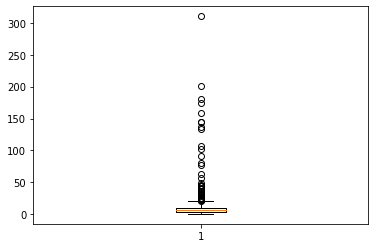

In [36]:
###checking the oulites
plt.boxplot(uber_data["MILES*"])
plt.show()

In [39]:
uber_data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

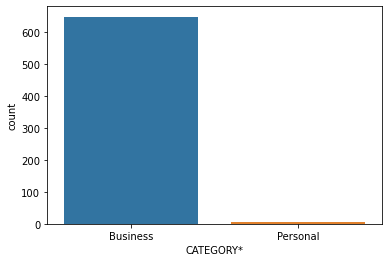

In [40]:
sns.countplot(x='CATEGORY*', data=uber_data)
plt.show()

###so in this we can say that business person travel more than the personal one

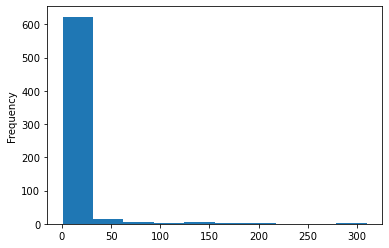

In [42]:
uber_data["MILES*"].plot.hist()
plt.show()

###Between o to 50 miles people travel more

Text(0.5, 1.0, 'Number of trips Vs hours')

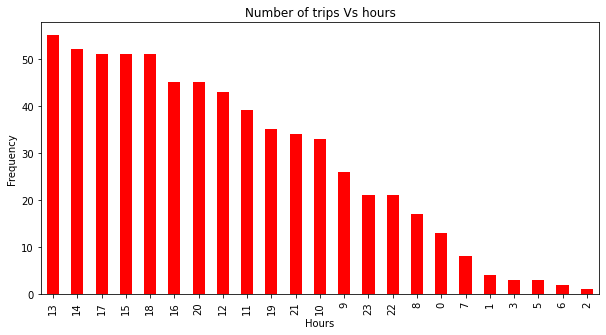

In [47]:
hours = uber_data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

<AxesSubplot:>

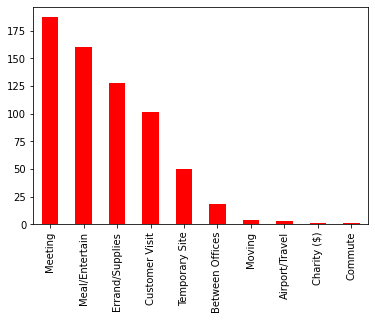

In [50]:
uber_data["PURPOSE*"].value_counts().plot(kind="bar", color="red")

meeting purpose has the highest number of trips

<AxesSubplot:>

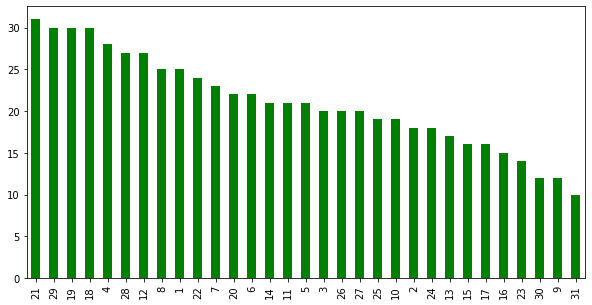

In [51]:

uber_data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

21sy day hast the highest trip

<AxesSubplot:>

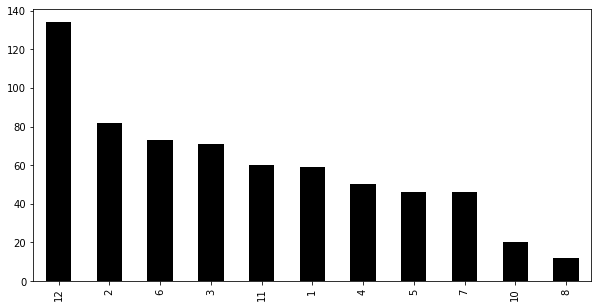

In [53]:
uber_data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

12th month has the highest trip